## 그래프 한글 폰트

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 67 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (18.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmr10',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmex10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXGeneral',
 'cmmi10',
 'STIXNonUnicode',
 'STIXGeneral',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'cmb10',
 'cmsy10',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'Liberation Serif',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumSquareRound',
 'Liberation Mono',
 'NanumMyeongjo',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'NanumMyeongjo',
 'Humor Sans',
 'Liberation Serif',
 'NanumBarunGothic',
 'Liberation Sans',
 'Liberation Mo

## 데이터 추출

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/mini_project/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [5]:
df = df[['customer_id', 'type', 'state' , 'course_title', 'category_title', 'transaction_amount', 'coupon_title', 'coupon_discount_amount', 'sale_price', 'subcategory_title']]
df.head()

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
0,504760.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,90500,NaN,NaN,110500.0,개발자 커리어
1,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,96000,NaN,NaN,116000.0,영상 편집
2,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN
3,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,171810,NaN,NaN,190900.0,NaN
4,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서


In [6]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             105416 non-null  float64
 1   type                    105419 non-null  object 
 2   state                   105419 non-null  object 
 3   course_title            105403 non-null  object 
 4   category_title          105395 non-null  object 
 5   transaction_amount      105419 non-null  int64  
 6   coupon_title            31817 non-null   object 
 7   coupon_discount_amount  31817 non-null   float64
 8   sale_price              104291 non-null  float64
 9   subcategory_title       85590 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.0+ MB


customer_id                   3
type                          0
state                         0
course_title                 16
category_title               24
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
subcategory_title         19829
dtype: int64

## category 8개로 축약하기 + 결측치 제거 (정제)

In [7]:
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14076
업무 생산성,13323
디자인,12009
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501
크리에이티브,2250
교육,1031


In [8]:
df = df.replace({'category_title':{'일러스트':'디자인'}})
df = df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14085
업무 생산성,13323
디자인,12010
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501
크리에이티브,2250
교육,1031


In [9]:
df = df[df.category_title != '교육']
df = df[df.category_title != '지식콘텐츠']
df = df[df.category_title != '비즈니스']
df = df[df.category_title != '파이낸스']
df = df[df.category_title != '관리']

df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14085
업무 생산성,13323
디자인,12010
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501
크리에이티브,2250


In [10]:
df = df[df.category_title != '크리에이티브']
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14085
업무 생산성,13323
디자인,12010
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501


In [11]:
df.isna().sum()

customer_id                   3
type                          0
state                         0
course_title                 16
category_title               24
transaction_amount            0
coupon_title              70532
coupon_discount_amount    70532
sale_price                  208
subcategory_title         16423
dtype: int64

In [12]:
# 결측치 제거
df = df.dropna(subset=['category_title']) 
df.isna().sum()

customer_id                   0
type                          0
state                         0
course_title                  0
category_title                0
transaction_amount            0
coupon_title              70508
coupon_discount_amount    70508
sale_price                  192
subcategory_title         16399
dtype: int64

In [13]:
sub_df = df.copy()

In [14]:
sub_df = df.dropna(subset=['subcategory_title'])
sub_df.isna().sum()

customer_id                   0
type                          0
state                         0
course_title                  0
category_title                0
transaction_amount            0
coupon_title              56468
coupon_discount_amount    56468
sale_price                   28
subcategory_title             0
dtype: int64

In [15]:

sub_df[sub_df['sale_price'].isnull()] 
sub_df = sub_df.dropna(subset=['sale_price'])
sub_df.isna().sum()

customer_id                   0
type                          0
state                         0
course_title                  0
category_title                0
transaction_amount            0
coupon_title              56440
coupon_discount_amount    56440
sale_price                    0
subcategory_title             0
dtype: int64

In [16]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85562 entries, 0 to 105418
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             85562 non-null  float64
 1   type                    85562 non-null  object 
 2   state                   85562 non-null  object 
 3   course_title            85562 non-null  object 
 4   category_title          85562 non-null  object 
 5   transaction_amount      85562 non-null  int64  
 6   coupon_title            29122 non-null  object 
 7   coupon_discount_amount  29122 non-null  float64
 8   sale_price              85562 non-null  float64
 9   subcategory_title       85562 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.2+ MB


## 구매자 [PAYMENT.COMPLETED.customer_id - REFUND.COMPLETED.customer_id] (정제)

In [17]:
a = sub_df['type'] == 'PAYMENT'
a = sub_df[a]
b = a['state'] == 'COMPLETED'
a = a[b]
a

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
4,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서
8,478033.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집
14,478035.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
22,455311.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,149500,NaN,NaN,149500.0,DevOps
28,471759.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,UX/UI
...,...,...,...,...,...,...,...,...,...,...
105411,669238.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,디자인툴
105412,384003.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,149000,NaN,NaN,149000.0,영상 편집
105413,670891.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,백엔드 개발
105416,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집


In [18]:
c = sub_df['type'] == 'REFUND'
c = sub_df[c]
d = c['state'] == 'COMPLETED'
b = c[d]
b

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
652,472666.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,-96000,NaN,NaN,116000.0,영상 편집
666,447177.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,-79000,NaN,NaN,89000.0,일러스트
676,469406.0,REFUND,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,-125000,NaN,NaN,145000.0,금융/투자 실무
701,456206.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 디자인 툴,디자인,-140000,NaN,NaN,170000.0,디자인툴
814,23129.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,-132050,NaN,NaN,139000.0,모션그래픽
...,...,...,...,...,...,...,...,...,...,...
105168,670215.0,REFUND,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,-171000,NaN,NaN,171000.0,글쓰기/카피라이팅
105169,600073.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,-149000,NaN,NaN,179000.0,백엔드 개발
105205,506356.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,-259000,NaN,NaN,259000.0,영상 편집
105245,604077.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,-109000,NaN,NaN,129000.0,엑셀/VBA


In [19]:
df_total = pd.merge(a,b,how='outer')
df_total

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
0,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서
1,478033.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집
2,478035.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
3,455311.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,149500,NaN,NaN,149500.0,DevOps
4,471759.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,UX/UI
...,...,...,...,...,...,...,...,...,...,...
46390,670215.0,REFUND,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,-171000,NaN,NaN,171000.0,글쓰기/카피라이팅
46391,600073.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,-149000,NaN,NaN,179000.0,백엔드 개발
46392,506356.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,-259000,NaN,NaN,259000.0,영상 편집
46393,604077.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,-109000,NaN,NaN,129000.0,엑셀/VBA


In [20]:
# df_total = df_total.drop_duplicates(subset='customer_id')
df_total = df_total.drop_duplicates(['customer_id' , 'course_title','coupon_title'],keep = 'last')

In [21]:
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]
df_pay

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
0,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서
1,478033.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집
2,478035.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
3,455311.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,149500,NaN,NaN,149500.0,DevOps
4,471759.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,UX/UI
...,...,...,...,...,...,...,...,...,...,...
43441,669238.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,디자인툴
43442,384003.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,149000,NaN,NaN,149000.0,영상 편집
43443,670891.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,백엔드 개발
43444,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집


In [22]:
a.head()

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
4,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서
8,478033.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집
14,478035.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
22,455311.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,149500,NaN,NaN,149500.0,DevOps
28,471759.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,UX/UI


## 재결재율:
1. 웰컴 할인쿠폰을 받은 사람 중 재결재률

In [23]:
df_pay['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                                3616
[WELCOME] 온라인 강의 3만원 할인쿠폰                               2143
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                                1657
[WELCOME] 온라인 강의 2만원 할인쿠폰                               1656
[WELCOME] 온라인 강의 1만원 할인쿠폰                               1332
                                                        ... 
[분할결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍_30,458원결제       1
[테스트쿠폰] 네이버 페이 간편결제 테스트용 쿠폰                                1
디지털 마케팅 MAX 무료 수강 쿠폰 (신수현)                                 1
[무료수강권] 완전정복! 시각디자인 기초_김진희 강사님                             1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                  1
Name: coupon_title, Length: 404, dtype: int64

In [24]:
sub_df['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                      5146
[WELCOME] 온라인 강의 3만원 할인쿠폰                     3206
[WELCOME] 온라인 강의 2만원 할인쿠폰                     2325
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                      2301
[WELCOME] 온라인 강의 1만원 할인쿠폰                     1899
                                              ... 
[무료수강권] 부동산 디벨로퍼                                 1
한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰       1
[CX] 관리자 외 계정 테스트용                               1
김영하 강의 후기 쿠폰                                     1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍        1
Name: coupon_title, Length: 418, dtype: int64

In [25]:
# 쿠폰 사용자 추출
coupon_df = sub_df[(sub_df['coupon_title'].str.contains('웰컴')) | (sub_df['coupon_title'].str.contains('WELCOME'))]
coupon_df

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
4,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서
8,478033.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,영상 편집
14,478035.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
15,478035.0,ORDER,CANCELLED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
28,471759.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,UX/UI
...,...,...,...,...,...,...,...,...,...,...
105393,638903.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,139000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,149000.0,영상 편집
105396,623392.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화,프로그래밍,173000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,203000.0,개발자 커리어
105414,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집
105416,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집


In [26]:
# 쿠폰 사용자 중, customer_id 중복값 추출
dup = coupon_df.duplicated(['customer_id'], keep=False)
overlap_df = coupon_df[dup]
overlap_df

,customer_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title
14,478035.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
15,478035.0,ORDER,CANCELLED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,프론트엔드 개발
38,474083.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,119000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,139000.0,모션그래픽
39,474083.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,119000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,139000.0,모션그래픽
42,474083.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 모션그래픽,영상/3D,119000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,139000.0,모션그래픽
...,...,...,...,...,...,...,...,...,...,...
105362,639924.0,PAYMENT,CANCELLED,올인원 패키지 : 해외소싱으로 온라인 커머스 정복하기,마케팅,159000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,169000.0,SNS마케팅
105387,638903.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,159000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,169000.0,영상 편집
105393,638903.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,139000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,149000.0,영상 편집
105414,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


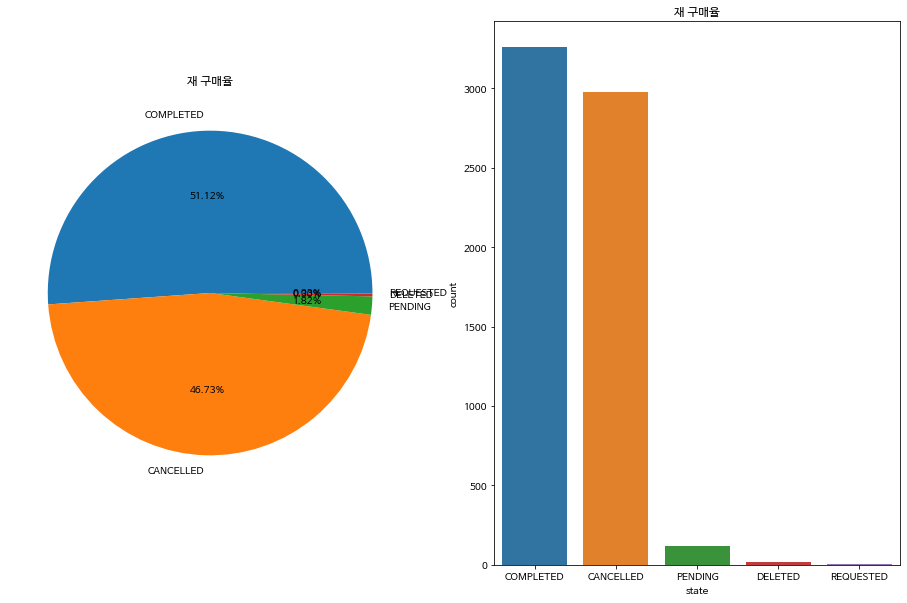

In [27]:
# 웰컴 쿠폰 사용자중 재 구매율

fig = plt.figure(figsize=(16,10))
graph1 = fig.add_subplot(1,2,1)
overlap_df['state'].value_counts().plot.pie(autopct='%1.2f%%',ax=graph1)
graph1.set_title('재 구매율')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('state',data=overlap_df,ax=graph2)
graph2.set_title('재 구매율')
plt.show(fig)

## 강의 가격
1. 같은 카테고리 안에서 서브 카테고리별 실 판매량
2. 같은 카테고리 안에서 서브 카테고리별 정가 평균 값

In [75]:
df_pay.category_title.value_counts()

프로그래밍      13155
디자인         5587
데이터사이언스     5512
영상/3D       5033
업무 생산성      4844
마케팅         4183
부동산/금융      2666
투자/재테크      1447
Name: category_title, dtype: int64

In [76]:
# category_title 별 subcategory_title로 나누기 (PAYMENT.COMPLETED : 실 구매자)

# 프로그래밍
cate1_df = df_pay[df_pay['category_title'] == '프로그래밍']


# 디자인
cate2_df = df_pay[df_pay['category_title'] == '디자인']


# 데이터사이언스
cate3_df = df_pay[df_pay['category_title'] == '데이터사이언스']


# 영상/ 3D
cate4_df = df_pay[df_pay['category_title'] == '영상/3D']


# 업무 생산성
cate5_df = df_pay[df_pay['category_title'] == '업무 생산성']


# 마케팅
cate6_df = df_pay[df_pay['category_title'] == '마케팅']


# 부동산 금융
cate7_df = df_pay[df_pay['category_title'] == '부동산/금융']


# 투자/재테크
cate8_df = df_pay[df_pay['category_title'] == '투자/재테크']


In [77]:
# 전체 DataFrame에서 subcategory_title 나누고, 
#나눠진 data에서 실 판매 금액 평균값 구하기

# 프로그래밍
cate11_df = sub_df[sub_df['category_title'] == '프로그래밍']

how = {
    "sale_price" : np.mean
}
subctgr1_df = cate11_df.groupby('subcategory_title').agg(how)

# 디자인
cate12_df = sub_df[sub_df['category_title'] == '디자인']

how = {
    "sale_price" : np.mean
}
subctgr2_df = cate12_df.groupby('subcategory_title').agg(how)

# 데이터사이언스
cate13_df = sub_df[sub_df['category_title'] == '데이터사이언스']

how = {
    "sale_price" : np.mean
}
subctgr3_df = cate13_df.groupby('subcategory_title').agg(how)

# 영상/ 3D
cate14_df = sub_df[sub_df['category_title'] == '영상/3D']

how = {
    "sale_price" : np.mean
}
subctgr4_df = cate14_df.groupby('subcategory_title').agg(how)

# 업무 생산성
cate15_df = sub_df[sub_df['category_title'] == '업무 생산성']

how = {
    "sale_price" : np.mean
}
subctgr5_df = cate15_df.groupby('subcategory_title').agg(how)

# 마케팅
cate16_df = sub_df[sub_df['category_title'] == '마케팅']

how = {
    "sale_price" : np.mean
}
subctgr6_df = cate16_df.groupby('subcategory_title').agg(how)

# 부동산 금융
cate17_df = sub_df[sub_df['category_title'] == '부동산/금융']

how = {
    "sale_price" : np.mean
}
subctgr7_df = cate17_df.groupby('subcategory_title').agg(how)

# 투자/재테크
cate18_df = sub_df[sub_df['category_title'] == '투자/재테크']

how = {
    "sale_price" : np.mean
}
subctgr8_df = cate18_df.groupby('subcategory_title').agg(how)

In [78]:
# max_df = cate1_df[cate1_df['category_title'] == '프로그래밍']
# max_df.max()
# max_df[max_df.sale_price == 1350000.0]
# max_df.subcategory_title.value_counts().sort_values(ascending=False)

Text(0.5, 1.0, '투자/재테크')

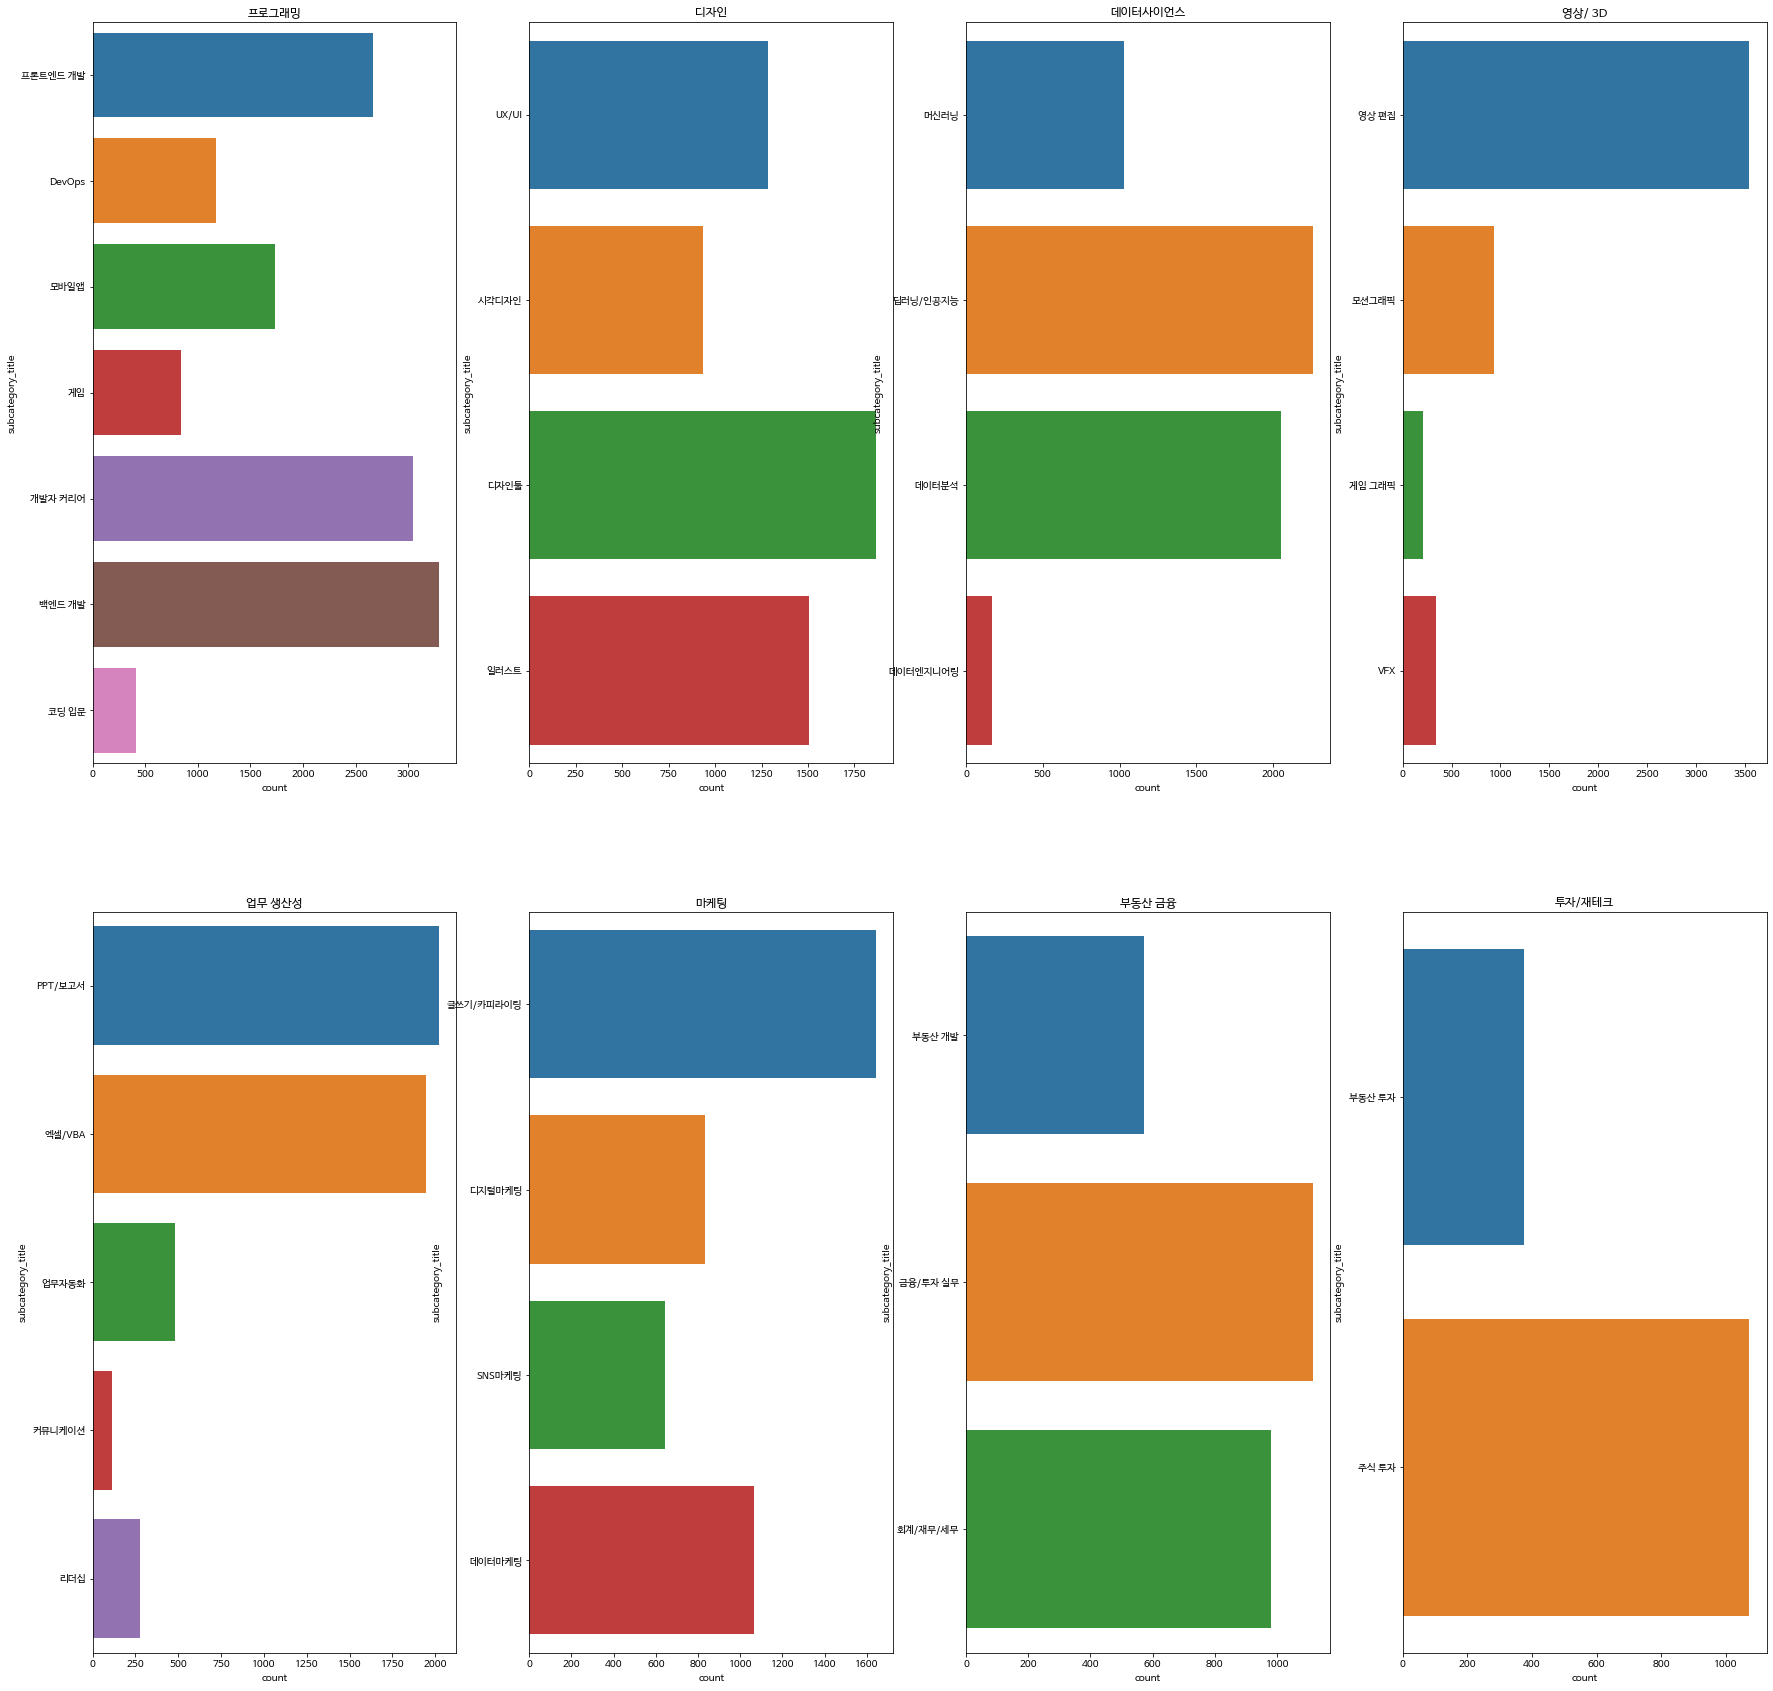

In [79]:
# subcategory_title 별 PAYMENT.COMPLETED 된 건 (실 판매량)

fig = plt.figure(figsize=(30,30))
graph1 = fig.add_subplot(2,4,1)
graph2 = fig.add_subplot(2,4,2)
graph3 = fig.add_subplot(2,4,3)
graph4 = fig.add_subplot(2,4,4)
graph5 = fig.add_subplot(2,4,5)
graph6 = fig.add_subplot(2,4,6)
graph7 = fig.add_subplot(2,4,7)
graph8 = fig.add_subplot(2,4,8)

sns.countplot(data=cate1_df, y='subcategory_title', ax=graph1)
graph1.set_title('프로그래밍')
sns.countplot(data=cate2_df, y='subcategory_title', ax=graph2)
graph2.set_title('디자인')
sns.countplot(data=cate3_df, y='subcategory_title', ax=graph3)
graph3.set_title('데이터사이언스')
sns.countplot(data=cate4_df, y='subcategory_title', ax=graph4)
graph4.set_title('영상/ 3D')
sns.countplot(data=cate5_df, y='subcategory_title', ax=graph5)
graph5.set_title('업무 생산성')
sns.countplot(data=cate6_df, y='subcategory_title', ax=graph6)
graph6.set_title('마케팅')
sns.countplot(data=cate7_df, y='subcategory_title', ax=graph7)
graph7.set_title('부동산 금융')
sns.countplot(data=cate8_df, y='subcategory_title', ax=graph8)
graph8.set_title('투자/재테크')

Text(0.5, 1.0, '투자/재테크')

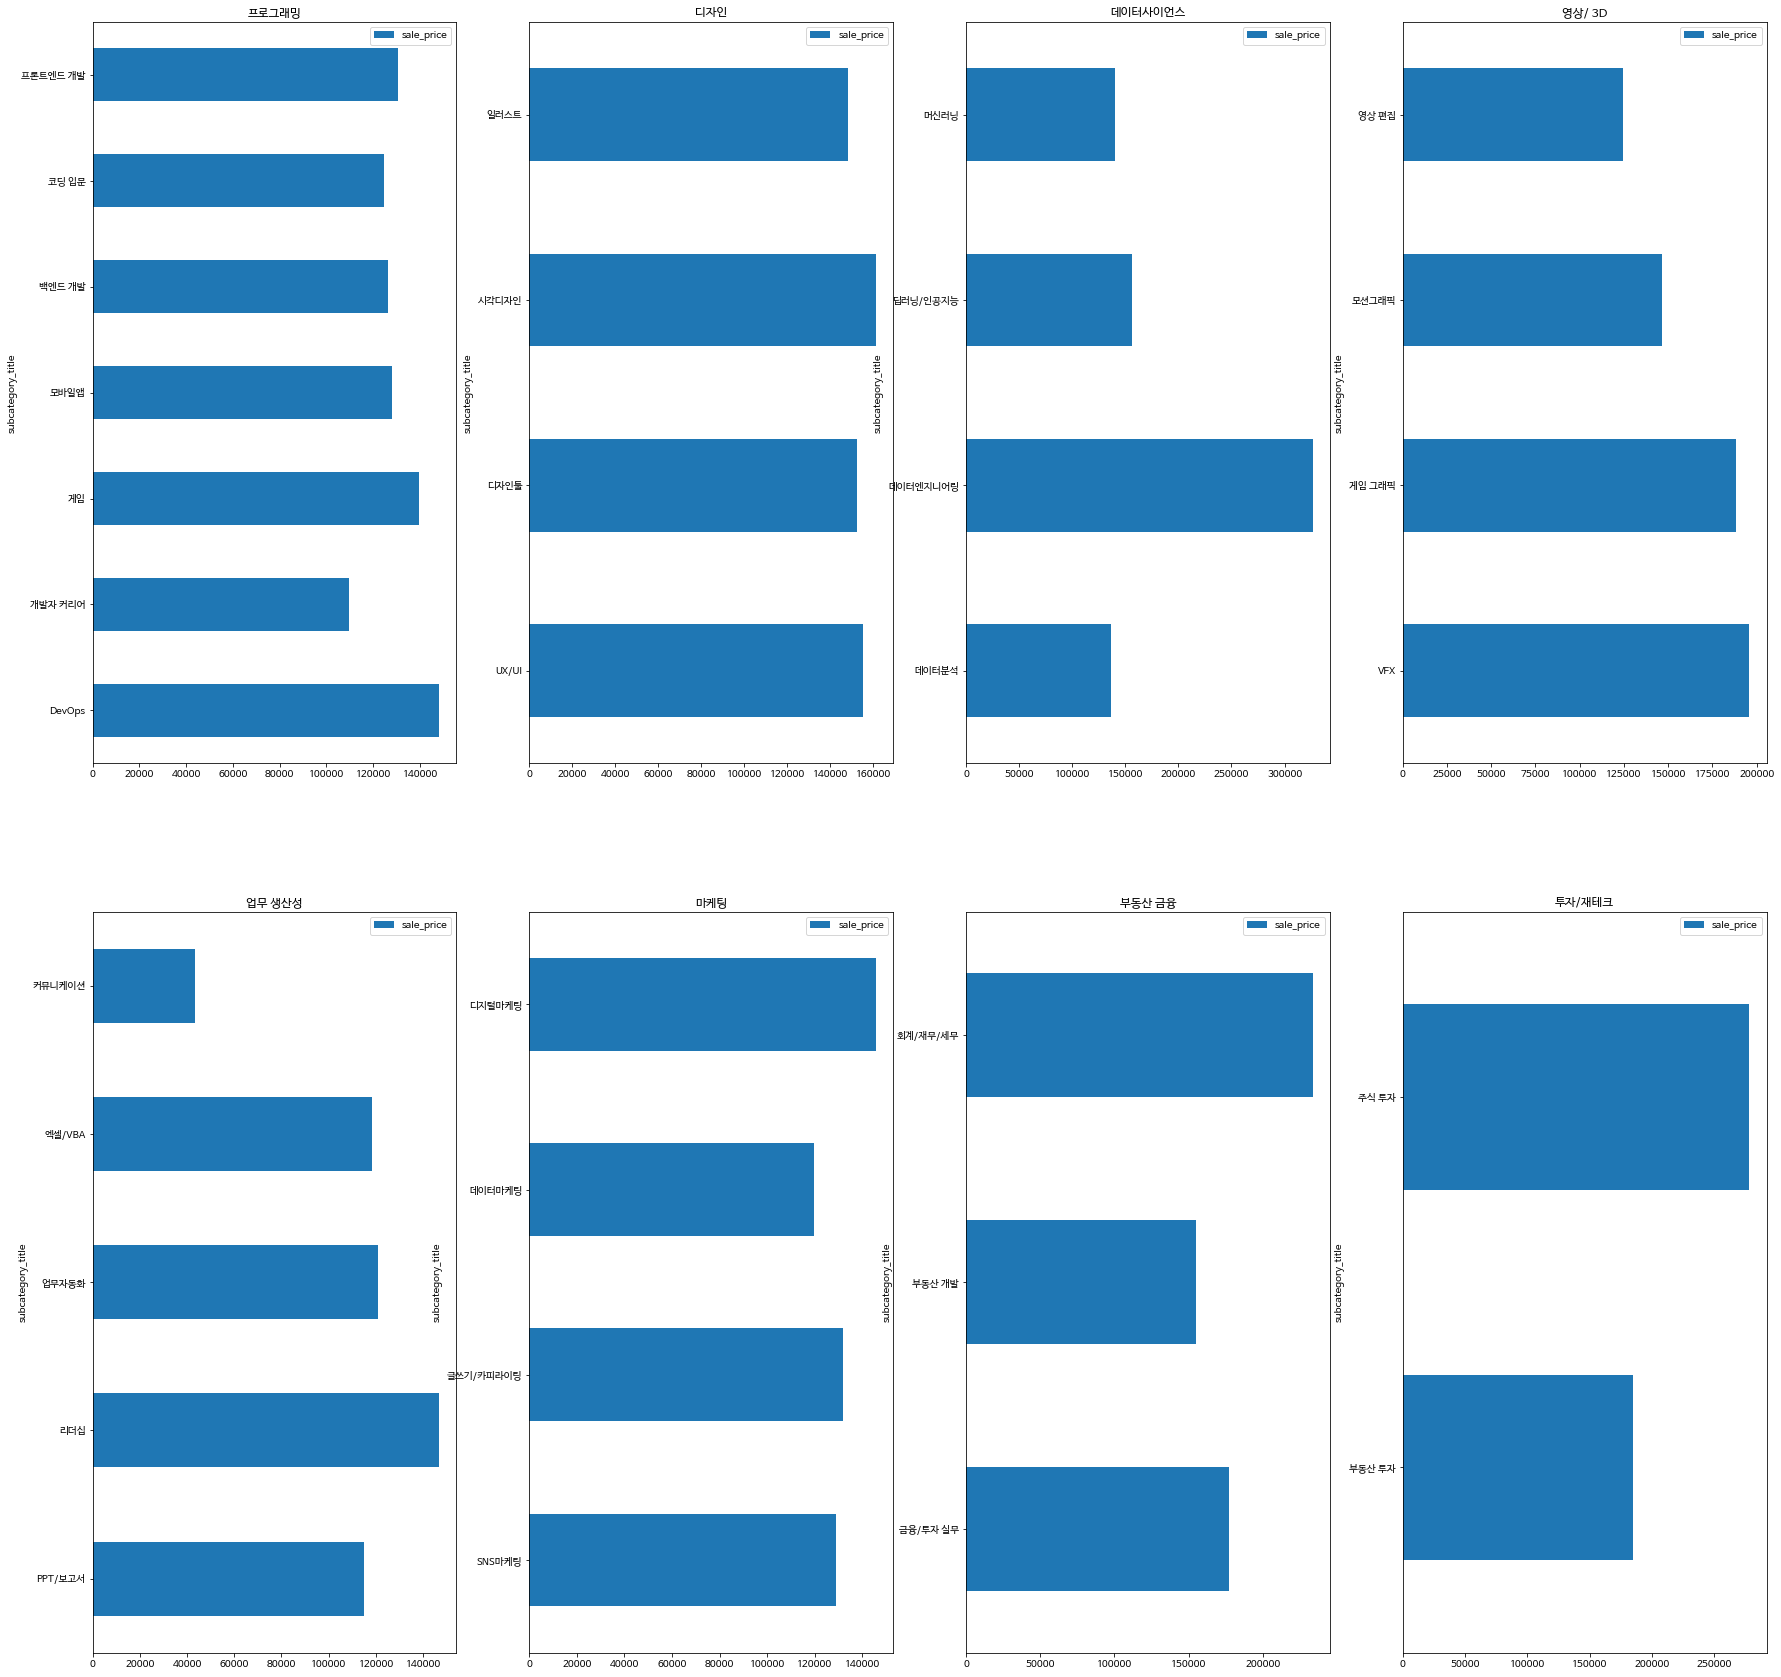

In [80]:
# subcategory_title 별 강의 실판매 금액 (평균 값)

fig = plt.figure(figsize=(30,30))
graph1 = fig.add_subplot(2,4,1)
graph2 = fig.add_subplot(2,4,2)
graph3 = fig.add_subplot(2,4,3)
graph4 = fig.add_subplot(2,4,4)
graph5 = fig.add_subplot(2,4,5)
graph6 = fig.add_subplot(2,4,6)
graph7 = fig.add_subplot(2,4,7)
graph8 = fig.add_subplot(2,4,8)

subctgr1_df.plot.barh(ax=graph1)
graph1.set_title('프로그래밍')
subctgr2_df.plot.barh(ax=graph2)
graph2.set_title('디자인')
subctgr3_df.plot.barh(ax=graph3)
graph3.set_title('데이터사이언스')
subctgr4_df.plot.barh(ax=graph4)
graph4.set_title('영상/ 3D')
subctgr5_df.plot.barh(ax=graph5)
graph5.set_title('업무 생산성')
subctgr6_df.plot.barh(ax=graph6)
graph6.set_title('마케팅')
subctgr7_df.plot.barh(ax=graph7)
graph7.set_title('부동산 금융')
subctgr8_df.plot.barh(ax=graph8)
graph8.set_title('투자/재테크')

실 판매 금액(평균값)과 판매량은 무관한걸로 확인됨

## 할인 금액
1. 카테고리 별 할인율 (혜택을 받은 사람 vs 안받은 사람)
2. 서브 카테고리 별 할인율 (혜택을 받은 사람 vs 안받은 사람)

In [81]:
# 각 category_title 별, 할인 받은 raw 변수 만들고, (실 구매자 데이터 : cate1_df)
# 각 category_title 별, 할인 여부 시각화를 위한 column 추가

disco1 = cate1_df['transaction_amount'] < cate1_df['sale_price']
disco2 = cate2_df['transaction_amount'] < cate2_df['sale_price']
disco3 = cate3_df['transaction_amount'] < cate3_df['sale_price']
disco4 = cate4_df['transaction_amount'] < cate4_df['sale_price']
disco5 = cate5_df['transaction_amount'] < cate5_df['sale_price']
disco6 = cate6_df['transaction_amount'] < cate6_df['sale_price']
disco7 = cate7_df['transaction_amount'] < cate7_df['sale_price']
disco8 = cate8_df['transaction_amount'] < cate8_df['sale_price']


# 1
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate21_df = cate1_df['discount'] = disco1.map(func)

# 2
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate22_df = cate2_df['discount'] = disco2.map(func)

# 3
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate23_df = cate3_df['discount'] = disco3.map(func)

# 4
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate24_df = cate4_df['discount'] = disco4.map(func)

# 5
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate25_df = cate5_df['discount'] = disco5.map(func)

# 6
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate26_df = cate6_df['discount'] = disco6.map(func)

# 7
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate27_df = cate7_df['discount'] = disco7.map(func)

# 8
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate28_df = cate8_df['discount'] = disco8.map(func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [82]:
# subcategory_title 별 discount 평균치 값 구하기
# data는 실 구매자 데이터를 활용

# 1
how = {
    "discount" : np.mean
}
dv1 = cate1_df.groupby('subcategory_title').agg(how)

# 2
how = {
    "discount" : np.mean
}
dv2 = cate2_df.groupby('subcategory_title').agg(how)

# 3
how = {
    "discount" : np.mean
}
dv3 = cate3_df.groupby('subcategory_title').agg(how)

# 4
how = {
    "discount" : np.mean
}
dv4 = cate4_df.groupby('subcategory_title').agg(how)

# 5
how = {
    "discount" : np.mean
}
dv5 = cate5_df.groupby('subcategory_title').agg(how)

# 6
how = {
    "discount" : np.mean
}
dv6 = cate6_df.groupby('subcategory_title').agg(how)

# 7
how = {
    "discount" : np.mean
}
dv7 = cate7_df.groupby('subcategory_title').agg(how)

# 8
how = {
    "discount" : np.mean
}
dv8 = cate8_df.groupby('subcategory_title').agg(how)

Text(0.5, 1.0, '투자/재테크')

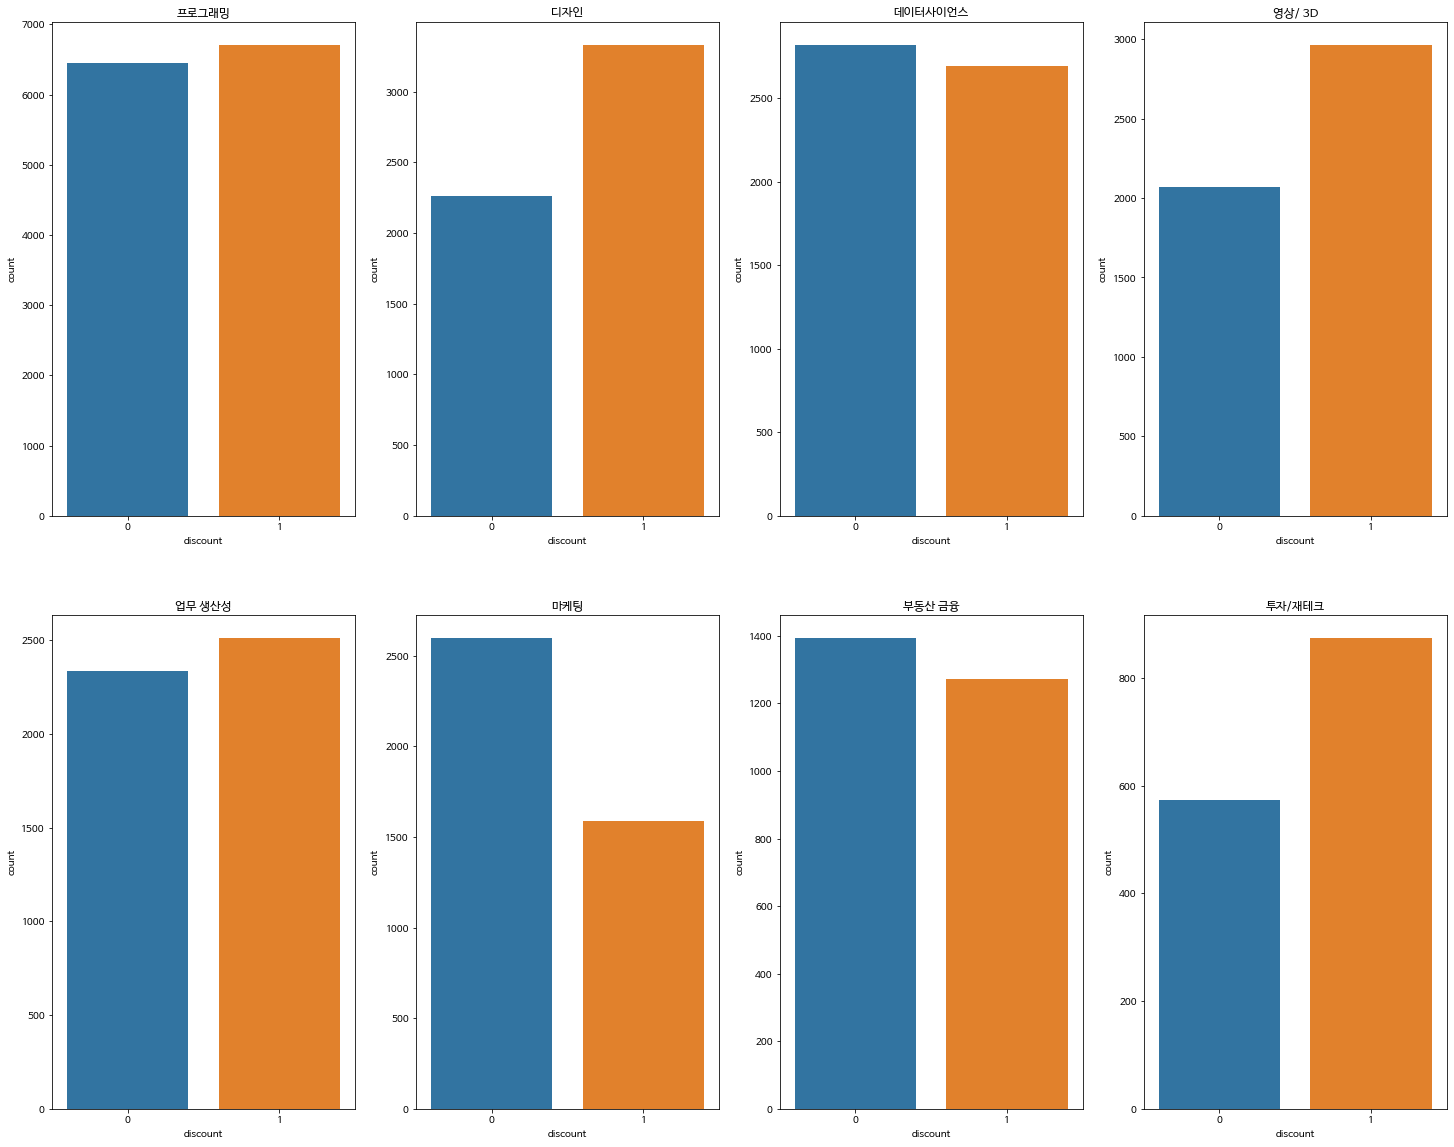

In [83]:
# 실 구매자 중 category_title별, 할인 받은 count 개수 시각화

fig = plt.figure(figsize=(25,20))
graph11 = fig.add_subplot(2,4,1)
graph12 = fig.add_subplot(2,4,2)
graph13 = fig.add_subplot(2,4,3)
graph14 = fig.add_subplot(2,4,4)
graph15 = fig.add_subplot(2,4,5)
graph16 = fig.add_subplot(2,4,6)
graph17 = fig.add_subplot(2,4,7)
graph18 = fig.add_subplot(2,4,8)


sns.countplot(data=cate1_df, x='discount', ax=graph11)
graph11.set_title('프로그래밍')
sns.countplot(data=cate2_df, x='discount', ax=graph12)
graph12.set_title('디자인')
sns.countplot(data=cate3_df, x='discount', ax=graph13)
graph13.set_title('데이터사이언스')
sns.countplot(data=cate4_df, x='discount', ax=graph14)
graph14.set_title('영상/ 3D')
sns.countplot(data=cate5_df, x='discount', ax=graph15)
graph15.set_title('업무 생산성')
sns.countplot(data=cate6_df, x='discount', ax=graph16)
graph16.set_title('마케팅')
sns.countplot(data=cate7_df, x='discount', ax=graph17)
graph17.set_title('부동산 금융')
sns.countplot(data=cate8_df, x='discount', ax=graph18)
graph18.set_title('투자/재테크')

Text(0.5, 1.0, '투자/재테크')

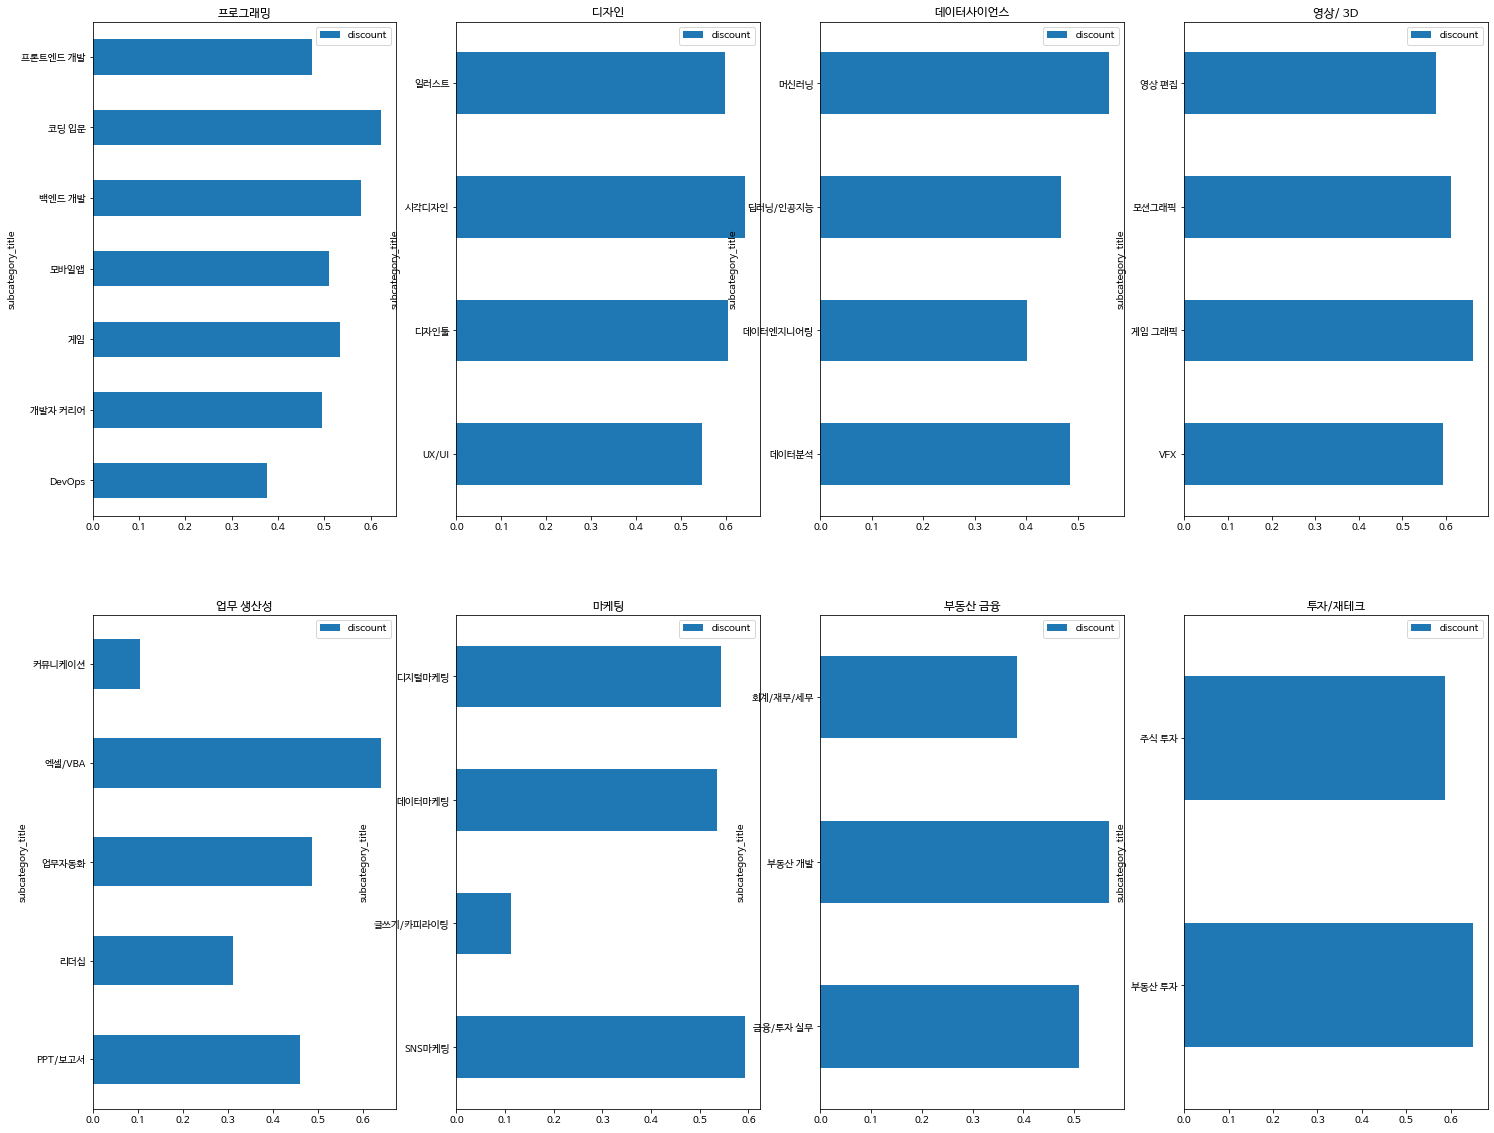

In [84]:
# 실 구매자 중 subcategory_title별, 할인 받은 count 평균 시각화

fig = plt.figure(figsize=(25,20))
graph11 = fig.add_subplot(2,4,1)
graph12 = fig.add_subplot(2,4,2)
graph13 = fig.add_subplot(2,4,3)
graph14 = fig.add_subplot(2,4,4)
graph15 = fig.add_subplot(2,4,5)
graph16 = fig.add_subplot(2,4,6)
graph17 = fig.add_subplot(2,4,7)
graph18 = fig.add_subplot(2,4,8)



dv1.plot.barh(ax=graph11)
graph11.set_title('프로그래밍')
dv2.plot.barh(ax=graph12)
graph12.set_title('디자인')
dv3.plot.barh(ax=graph13)
graph13.set_title('데이터사이언스')
dv4.plot.barh(ax=graph14)
graph14.set_title('영상/ 3D')
dv5.plot.barh(ax=graph15)
graph15.set_title('업무 생산성')
dv6.plot.barh(ax=graph16)
graph16.set_title('마케팅')
dv7.plot.barh(ax=graph17)
graph17.set_title('부동산 금융')
dv8.plot.barh(ax=graph18)
graph18.set_title('투자/재테크')


특정 (서브)카테고리 를 제외하고 평균적으로 할인을 받은걸로 확인됨

## 메인(+서브)카테고리
1.카테고리 별 환불

In [85]:
# 이전 정제된 데이터에서 REFUND.COMPLETED 데이터 추출

refund_df = df_total[(df_total['type'] == 'REFUND') & (df_total['state'] == 'COMPLETED')]
refund_df['category_title'].value_counts()

프로그래밍      988
디자인        453
영상/3D      361
데이터사이언스    327
마케팅        274
업무 생산성     267
부동산/금융     136
투자/재테크     107
Name: category_title, dtype: int64

In [86]:
refund_value_df = refund_df['category_title'].value_counts()
refund_value_df

프로그래밍      988
디자인        453
영상/3D      361
데이터사이언스    327
마케팅        274
업무 생산성     267
부동산/금융     136
투자/재테크     107
Name: category_title, dtype: int64

Text(0, 0.5, '')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


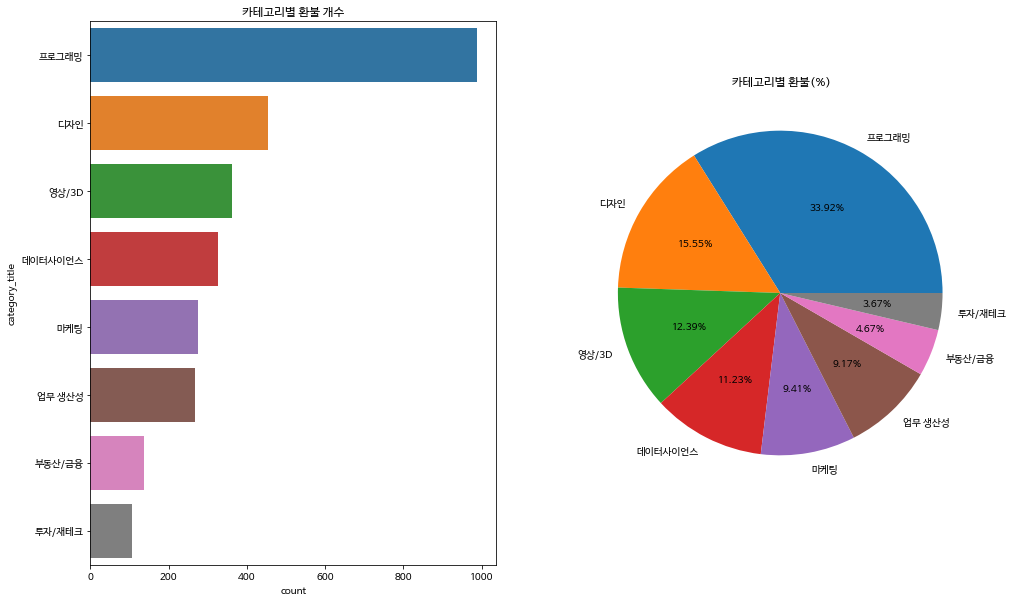

In [87]:
# 카테고리별 환불 개수

fig = plt.figure(figsize=(16,10))
graph_1 = fig.add_subplot(1,2,1)
graph_2 = fig.add_subplot(1,2,2)

sns.countplot(data=refund_df, y='category_title', ax=graph_1, order=['프로그래밍', '디자인', '영상/3D', '데이터사이언스', '마케팅', '업무 생산성', '부동산/금융', '투자/재테크'])
graph_1.set_title('카테고리별 환불 개수')

refund_value_df.plot.pie(autopct='%1.2f%%',ax=graph_2, subplots=True)
graph_2.set_title('카테고리별 환불(%)')
graph_2.set_ylabel('')

## a

In [ ]:
# COMPLETED / CANCELLED 실적 확인
display(df.state.value_counts())

# state [ completed / cancelled ] 에 대해, transaction_amount 비교 / 시각화  
#display(df_i[['state', 'transaction_amount']])
x1 = df[['state', 'transaction_amount']]
display(x1.groupby('state').agg(['count','sum'])) # 8002033457 --> 7원 ? 발견. 잘못된걸까?
# ∴ 통상 외화결제가 아닌 이상 원단위로 끝나는 경우가 없을 건데.. 할인쿠폰 떄문이 아닐까 싶다.

COMPLETED    60700
CANCELLED    39997
PENDING       1105
DELETED        174
REQUESTED       13
Name: state, dtype: int64

transaction_amount            
                       count         sum
state                                   
CANCELLED              39997  5670439518
COMPLETED              60700  7412008070
DELETED                  174    26971600
PENDING                 1105   167248680
REQUESTED                 13     1874700

In [ ]:
df_1 = df[df.format == 'B2G']
df_1.course_title.value_counts()
df_1[df_1.category_title == '마케팅']
df_1.sale_price.max()
df_1.transaction_amount.max()

20000000

In [ ]:
df.format.value_counts()
df = df[df.format != '온라인']
df = df[df.format != '콜로소']
df = df[df.format != '관리']
df = df.dropna(subset=['format']) 
df.isna().sum()


id                            0
customer_id                   0
course_id                  5190
type                          0
state                         0
course_title                  0
category_title                7
format                        0
completed_at                  0
transaction_amount            0
coupon_title              73581
coupon_discount_amount    73581
sale_price                 1112
tax_free_amount            1112
pg                        15058
method                    13095
subcategory_title         19808
marketing_start_at        17958
dtype: int64

In [ ]:
df_2 = df_pay[df_pay.transaction_amount > 0]
df_2

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
1,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
3,970695,455311.0,203146.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,NaN,NaN,149500.0,149500.0,NaN,CARD,DevOps,2021-02-08
4,970704,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,99000.0,NaN,CARD,UX/UI,2021-03-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43441,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
43442,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02
43443,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
43444,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [ ]:
how = {
    "transaction_amount" : np.mean
}
dv1 = df_2.groupby('format').agg(how)

dv1

,transaction_amount
format,
B2G,4.098100e+05
RED,1.636716e+05
올인원,1.241242e+05
캠프,1.371429e+06
